In [2]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
from scipy.signal import welch

In [3]:
#read in data file and skip to data
file=open("/Users/Roslyn/Desktop/run-XXXII", "r")

In [4]:
with file as f:
    lines_after_6 = f.readlines()[7:]

In [5]:
#extract first two coloumns and convert to float
col1=[]
for x in lines_after_6:
    col1.append(float(x.split()[0]))
        
col2=[]
for x in lines_after_6:
    col2.append(float(x.split()[1]))
    
col3=[]
for x in lines_after_6:
    col3.append(float(x.split()[2]))    

col4=[]
for x in lines_after_6:
    col4.append(float(x.split()[3]))
    

In [6]:
#combine real and imaginary parts to give list of complex data outputs
datamode1=np.vectorize(complex)(col1, col2)
datamode2=np.vectorize(complex)(col3, col4)

#print(datamode2[:5])

In [7]:
#enter constants
f_mode1 = 4.993017E6
f_mode2 = 5.505658500E+6 #- 2.8
kappa_1 = 0.000576417
kappa_2 = 0.000619449
Q1 = 4.4E7
Q2 = 4.84E7
dt=0.01
fs=100

w_mode1= 2*np.pi*f_mode1
w_mode2= 2*np.pi*f_mode2
tau1=Q1/w_mode1
tau2=Q2/w_mode2

h0=0.0005
trap=0.848

Zsquid= 1.2e6

In [8]:
data1=datamode1[:10000000]
data2=datamode2[:10000000]

In [9]:
#PSD using Welch method 
f_1, S_1 = welch(
        (data1)-np.mean(data1), fs=fs, nperseg=(len(data1)/256),
         return_onesided=False, detrend=None, scaling='density', window='hanning')

f_2, S_2 = welch(
        (data2)-np.mean(data2), fs=fs, nperseg=(len(data2)/256),
         return_onesided=False, detrend=None, scaling='density', window='hanning')


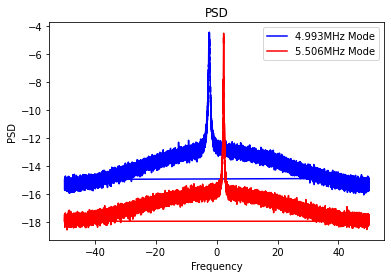

In [10]:
f_1=f_1[10:39060]
S_1=S_1[10:39060]

f_2=f_2[10:39060]
S_2=S_2[10:39060]

plt.plot(f_1, 10*np.log10(S_1), 'b', label='4.993MHz Mode')
plt.plot(f_2, 10*np.log10(S_2), 'r', label='5.506MHz Mode')
plt.title('PSD')
#plt.xscale('log')
plt.xlabel('Frequency')
plt.ylabel('PSD')
#plt.ylim(-30, 30)
plt.legend()
plt.show()

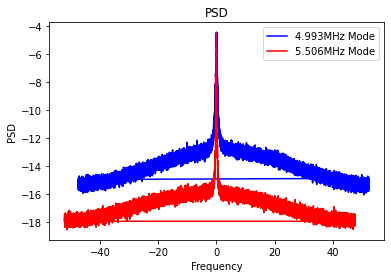

In [11]:
maxS1=np.argmax(S_1)
shift1=f_1[maxS1]
f_1=f_1+abs(shift1)

maxS2=np.argmax(S_2)
shift2=f_2[maxS2]
f_2=f_2-abs(shift2)

plt.plot(f_1, 10*np.log10(S_1), 'b', label='4.993MHz Mode')
plt.plot(f_2, 10*np.log10(S_2), 'r', label='5.506MHz Mode')
plt.title('PSD')
#plt.xscale('log')
plt.xlabel('Frequency')
plt.ylabel('PSD')
#plt.ylim(-30, 30)
plt.legend()
plt.show()

In [12]:
#SPECTRAL DISPLACEMENT DENSITY Su
#eq (8) GW Summary

#omega frequency axis, add mode freq 1 and convert from Hz to rad/s, and create squared axis 
w_1= [(x+f_mode1)*(2*np.pi) for x in f_1]
w_1sq= [x**2 for x in w_1]
w_2= [(x+f_mode2)*(2*np.pi) for x in f_2]
w_2sq= [x**2 for x in w_2]

#multiply 1/omega^2 list and Sv 
product1= [(1/a) * b for a, b in zip(w_1sq, S_1)]
product2= [(1/a) * b for a, b in zip(w_2sq, S_2)]
 
#Put into equation for Su
#10^-6 squared is a conversion from micro V to V
constants1 = (1/kappa_1**2)*(1/(Zsquid**2)*(10**(-6))**2)
constants2 = (1/kappa_2**2)*(1/(Zsquid**2)*(10**(-6))**2)

Su1 = [x*(constants1) for x in product1]
Su2 = [x*(constants2) for x in product2]

In [13]:
#AXIS REORDERING TO REMOVE LINE

print(len(f_1))
print(np.argmax(f_1))
f_1L=f_1.tolist()
f_2L=f_2.tolist()



pos1=f_1L[19521:]
neg1=f_1L[0:19521]

pos2=f_2L[19521:]
neg2=f_2L[0:19521]

f_1o=pos1+neg1
f_2o=pos2+neg2
print(len(f_1o))
print(len(f_2o))

39050
19520
39050
39050


In [14]:
Supos1=Su1[19521:]
Suneg1=Su1[0:19521]

Supos2=Su2[19521:]
Suneg2=Su2[0:19521]

Su1o=Supos1+Suneg1
Su2o=Supos2+Suneg2
print(len(f_1o))
print(len(f_2o))

39050
39050


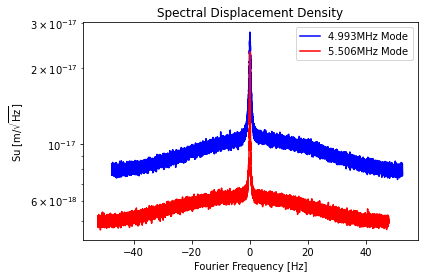

In [15]:
plt.plot(f_1o, np.sqrt(Su1o), 'b', label='4.993MHz Mode')
plt.plot(f_2o, np.sqrt(Su2o), 'r', label='5.506MHz Mode')
#plt.xscale('log')
plt.yscale('log')
plt.title('Spectral Displacement Density')
plt.xlabel('Fourier Frequency [Hz]')
plt.ylabel('Su [m$/\sqrt{\mathrm{Hz}}]$')
plt.legend()
#plt.savefig('SDD3report.png', format='png')
plt.show()


In [16]:
#transfer function (equation 6 GW Summary)
def trans1(w):
    return np.absolute(((-w)**2*h0*trap/2)/((w*1j)**2+(w*1j)/tau1+w_mode1**2))

def trans2(w):
    return np.absolute(((-w)**2*h0*trap/2)/((w*1j)**2+(w*1j)/tau2+w_mode2**2))

In [17]:
H_1=np.array(list(map(trans1,2*np.pi*(f_1+f_mode1))))
H_2=np.array(list(map(trans2,2*np.pi*(f_2+f_mode2))))

In [18]:
H_1L=H_1.tolist()
H_2L=H_2.tolist()

Hpos1=H_1L[19521:]
Hneg1=H_1L[0:19521]

Hpos2=H_2L[19521:]
Hneg2=H_2L[0:19521]

H_1o=Hpos1+Hneg1
H_2o=Hpos2+Hneg2


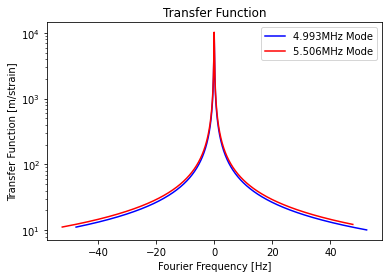

In [19]:
plt.plot(f_1o, H_1o, 'b', label='4.993MHz Mode')
plt.plot(f_2o, H_2o, 'r', label='5.506MHz Mode')
#plt.xscale('log')
plt.yscale('log')
plt.title('Transfer Function')
plt.xlabel('Fourier Frequency [Hz]')
plt.ylabel('Transfer Function [m/strain]')
plt.legend()
plt.savefig('TFreport1.png', format='png')
plt.show()

In [20]:
h_1=np.sqrt(Su1)/H_1
h_2=np.sqrt(Su2)/H_2

In [21]:
h_1L=h_1.tolist()
h_2L=h_2.tolist()

hpos1=h_1L[19521:]
hneg1=h_1L[0:19521]

hpos2=h_2L[19521:]
hneg2=h_2L[0:19521]

h_1o=hpos1+hneg1
h_2o=hpos2+hneg2

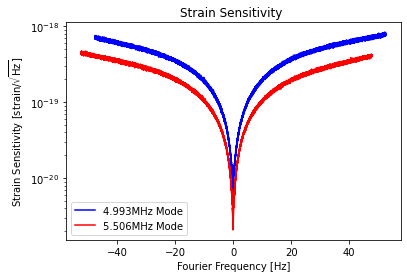

In [22]:
plt.plot(f_1o, h_1o, 'b', label='4.993MHz Mode')
plt.plot(f_2o, h_2o, 'r', label='5.506MHz Mode')
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('Fourier Frequency [Hz]')
plt.ylabel('Strain Sensitivity [strain$/\sqrt{\mathrm{Hz}}]$')
plt.title('Strain Sensitivity ')
plt.legend()
#plt.savefig('SSreport.png', format='png')
plt.show()

In [23]:
print(np.amin(h_1o))
print(np.amin(h_2o))



2.789327691808704e-21
2.087014559745383e-21
